In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C:/Users/user/Desktop/data/train.csv')

In [3]:
data

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [4]:
x_train = data.iloc[:,3:]

In [5]:
x_train.shape

(2048, 784)

In [6]:
y_train = pd.get_dummies(data.digit)

y_train

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2043,0,0,0,0,0,0,1,0,0,0
2044,0,1,0,0,0,0,0,0,0,0
2045,0,0,0,0,0,0,0,0,0,1
2046,1,0,0,0,0,0,0,0,0,0


In [7]:
x_letter_train = pd.get_dummies(data.letter)

x_letter_train

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2045,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [9]:
x_train = np.array(x_train).reshape(-1,28,28,1)

In [10]:
x_train

array([[[[1],
         [1],
         [1],
         ...,
         [2],
         [0],
         [4]],

        [[0],
         [1],
         [3],
         ...,
         [4],
         [1],
         [3]],

        [[2],
         [0],
         [4],
         ...,
         [3],
         [3],
         [3]],

        ...,

        [[2],
         [1],
         [2],
         ...,
         [4],
         [1],
         [0]],

        [[3],
         [3],
         [3],
         ...,
         [3],
         [3],
         [0]],

        [[3],
         [2],
         [2],
         ...,
         [4],
         [3],
         [4]]],


       [[[0],
         [4],
         [0],
         ...,
         [1],
         [4],
         [2]],

        [[3],
         [3],
         [4],
         ...,
         [3],
         [4],
         [2]],

        [[1],
         [4],
         [2],
         ...,
         [4],
         [0],
         [4]],

        ...,

        [[2],
         [4],
         [4],
         ...,
         [0],


In [11]:
import matplotlib.pyplot as plt

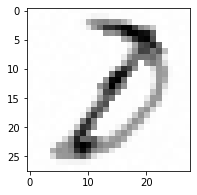

In [12]:
plt.figure(figsize=(3,3))
image = x_train[3].reshape(28,28)
plt.imshow(image, cmap='Greys')
plt.show()

In [13]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation


In [15]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_letter_train = np.array(x_letter_train)

print(x_train.shape, y_train.shape, x_letter_train.shape)

(2048, 28, 28, 1) (2048, 10) (2048, 26)


In [24]:
x_inputs = Input(shape=(28,28,1))
x_letter_inputs = Input(shape=(26,))

x = Conv2D(100,(3,3))(x_inputs)
x = Dropout(0.2)(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(50,(3,3))(x)
x = MaxPooling2D(2,2)(x)
x = Flatten()(x)

x = Dense(256, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(64)(x)


from keras.layers.merge import concatenate

merged_model = concatenate([x,x_letter_inputs])

out = Dense(64, activation = 'relu')(merged_model)
out = Dropout(0.2)(out)
out = Dense(32, activation = 'relu')(out)
out = Dropout(0.2)(out)
out = Dense(10, activation = 'softmax')(out)

model = Model(inputs=[x_inputs,x_letter_inputs], outputs = out)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 26, 26, 100)  1000        input_3[0][0]                    
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 26, 26, 100)  0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 13, 13, 100)  0           dropout_5[0][0]                  
____________________________________________________________________________________________

In [25]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('./best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.fit([x_train, x_letter_train], y_train, batch_size = 4, epochs = 500, validation_split = 0.2, callbacks=[es, mc])

Epoch 1/500
410/410 [==============================] - 5s 12ms/step - loss: 3.6766 - acc: 0.1093 - val_loss: 2.3088 - val_acc: 0.0780
Epoch 2/500
410/410 [==============================] - 4s 10ms/step - loss: 2.3675 - acc: 0.1190 - val_loss: 2.3082 - val_acc: 0.0854
Epoch 3/500
410/410 [==============================] - 4s 11ms/step - loss: 2.3289 - acc: 0.1136 - val_loss: 2.3064 - val_acc: 0.1317
Epoch 4/500
410/410 [==============================] - 4s 10ms/step - loss: 2.3225 - acc: 0.1203 - val_loss: 2.3077 - val_acc: 0.1073
Epoch 5/500
410/410 [==============================] - 4s 10ms/step - loss: 2.3117 - acc: 0.1178 - val_loss: 2.3122 - val_acc: 0.0756
Epoch 6/500
410/410 [==============================] - 4s 10ms/step - loss: 2.3070 - acc: 0.1270 - val_loss: 2.3130 - val_acc: 0.0732
Epoch 7/500
410/410 [==============================] - 4s 10ms/step - loss: 2.3087 - acc: 0.1203 - val_loss: 2.3148 - val_acc: 0.0756
Epoch 8/500
410/410 [==============================] - 4s 10ms

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
x_train

array([[[[1],
         [1],
         [1],
         ...,
         [2],
         [0],
         [4]],

        [[0],
         [1],
         [3],
         ...,
         [4],
         [1],
         [3]],

        [[2],
         [0],
         [4],
         ...,
         [3],
         [3],
         [3]],

        ...,

        [[2],
         [1],
         [2],
         ...,
         [4],
         [1],
         [0]],

        [[3],
         [3],
         [3],
         ...,
         [3],
         [3],
         [0]],

        [[3],
         [2],
         [2],
         ...,
         [4],
         [3],
         [4]]],


       [[[0],
         [4],
         [0],
         ...,
         [1],
         [4],
         [2]],

        [[3],
         [3],
         [4],
         ...,
         [3],
         [4],
         [2]],

        [[1],
         [4],
         [2],
         ...,
         [4],
         [0],
         [4]],

        ...,

        [[2],
         [4],
         [4],
         ...,
         [0],


In [49]:
datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            fill_mode='nearest')

In [50]:
lst=[]
for i in x_train[0:2]:
    i = i.reshape(1,28,28,1)

    for batch in datagen.flow(i, batch_size=1):
        lst.append(batch)

KeyboardInterrupt: 

In [ ]:
print(x_train.shape, x_letter_train.shape, y_train.shape)

In [ ]:
lst